In [1]:
file_name = '/Users/jamesburtonshaw/Downloads/33. BLI (15-Julio-2018) Well X5.xlsm' #Enter direct route to well log data file on YOUR PC.
sheet = 'Data' #Enter Excel Spreadsheet 'Sheet' name containing data of interest. In my case, the data is stored on a sheet called 'Data'.

In [2]:
import pandas as pd #Pandas is a library which will enable a dataframe to be initialized.
df = pd.read_excel(io=file_name, sheet_name=sheet) #Initialize a dataframe to contain the Excel sheet data.

print(df.head(25))  # CHECK - print first 25 rows of the dataframe to see if data has been imported correctly. 

      DEPTH       DEPTH (ft)       GR    RHOB    SONIC              CNL  \
0       NaN  Selected Curve:      NaN  R deep      NaN  Y Axis (Depth):   
1       NaN     Bit Size, in        :       8      NaN             Min:   
2       NaN              NaN      NaN     NaN      NaN              Max   
3    Count:             3713     3709    3677     3623             3677   
4     Min.:            10000   11.087   2.056   53.993             0.94   
5     Max.:            11856  139.751   2.727  117.937             32.7   
6     DEPTH            DEPTH       GR    RHOB    SONIC              CNL   
7         m               ft     ºAPI    g/cc    us/ft              NaN   
8      3048            10000   50.724   2.438  109.275            28.22   
9   3048.15          10000.5   48.364   2.438  108.487            28.22   
10   3048.3            10001   47.578   2.438    107.7            28.22   
11  3048.46          10001.5   48.291   2.438  109.275            28.22   
12  3048.61            10

In [3]:
df_2 = df.iloc[8:] #This step merely creates a new dataframe from the last dataframe excluding the rows before the actual data. In my case I have 8 blank rows between the column headers and the first row of data. If your data starts immediately you can comment this code line out by putting a '#' at the beginning of this line.
print(df_2.head(25)) # CHECK - print first 25 rows of the dataframe to see if data has been imported correctly. 

      DEPTH DEPTH (ft)      GR   RHOB    SONIC    CNL MSFL LL9S R_deep  \
8      3048      10000  50.724  2.438  109.275  28.22  NaN  NaN    NaN   
9   3048.15    10000.5  48.364  2.438  108.487  28.22  NaN  NaN    NaN   
10   3048.3      10001  47.578  2.438    107.7  28.22  NaN  NaN    NaN   
11  3048.46    10001.5  48.291  2.438  109.275  28.22  NaN  NaN    NaN   
12  3048.61      10002  49.155  2.438  109.275  28.22  NaN  NaN    NaN   
13  3048.76    10002.5  50.732  2.438   110.85  28.22  NaN  NaN    NaN   
14  3048.91      10003   51.52  2.438  111.756  28.22  NaN  NaN    NaN   
15  3049.07    10003.5  50.734  2.438  113.213  28.22  NaN  NaN    NaN   
16  3049.22      10004  49.579  2.438  114.787  28.22  NaN  NaN    NaN   
17  3049.37    10004.5  49.161  2.438      114  28.22  NaN  NaN    NaN   
18  3049.52      10005  49.936  2.438  112.769  28.22  NaN  NaN    NaN   
19  3049.68    10005.5  51.527  2.438  111.637  28.22  NaN  NaN    NaN   
20  3049.83      10006  52.316  2.438 

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:489: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(self.xlim)
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:489: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(self.xlim)
/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:489: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(self.xlim)


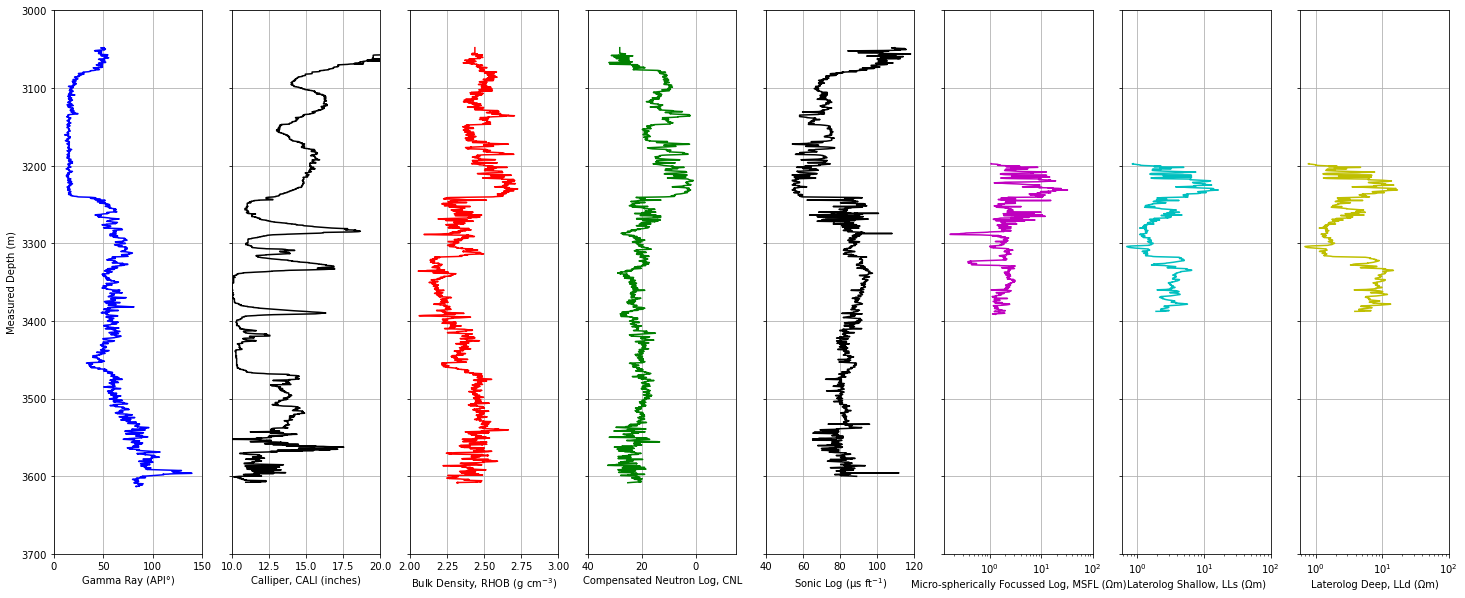

In [4]:
#PLOT ALL PETROPHYSICAL DATA TRACKS
import matplotlib.pyplot as plt #import the pyplot functionality from the matplotlib library. This enables the output of plots.

fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(25, 10)) #create a 1 x 8 structure such that the 8 data tracks are plotted side-by-side.

#ENSURE 'x' and 'y' arguments below match (EXACTLY) the names of the data columns in your spreadsheet. 
df_2.plot(x='GR', y='DEPTH', kind='line', ax=axes[0], grid=True, color='b', xlabel='Gamma Ray (API\N{DEGREE SIGN})',ylabel='Measured Depth (m)', ylim=(3000,3700), xlim=(0,150), legend=None) #Line of code controls Gamma Ray plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[0].invert_yaxis() #Ensure depth increases down the track. 
df_2.plot(x='CALI', y='DEPTH', kind='line', ax=axes[1], color='k', ylim=(3000,3700), grid=True, sharey=True, xlim=(10.0,20.0), xlabel='Calliper, CALI (inches)', legend=None) #Line of code controls Calliper plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[1].invert_yaxis() #Ensure depth increases down the track.
df_2.plot(x='RHOB', y='DEPTH', kind='line', ax=axes[2], color='r', ylim=(3000,3700), grid=True, sharey=True, xlim=(2.0,3.0), xlabel='Bulk Density, RHOB (g cm$^{-3}$)', legend=None) #Line of code controls Bulk Density plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[2].invert_yaxis() #Ensure depth increases down the track.
df_2.plot(x='CNL', y='DEPTH', kind='line', ax=axes[3], color='g', ylim=(3000,3700), grid=True, sharey=True, xlim=(-15,40), xlabel='Compensated Neutron Log, CNL', legend=None) #Line of code controls Neutron plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[3].invert_yaxis() #Ensure depth increases down the track.
axes[3].invert_xaxis() #Ensure neutron track increases towards the right NOT the left. This is typical in petrophysical analysis.
df_2.plot(x='SONIC', y='DEPTH', kind='line', ax=axes[4], color='k', ylim=(3000,3700), grid=True, sharey=True, xlim=(40,120), xlabel='Sonic Log (\u03BCs ft$^{-1}$)', legend=None) #Line of code controls Sonic plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[4].invert_yaxis() #Ensure depth increases down the track.
df_2.plot(x='MSFL', y='DEPTH', kind='line', ax=axes[5], logx=True, color='m', ylim=(3000,3700), grid=True, sharey=True, xlim=(0,100), xlabel='Micro-spherically Focussed Log, MSFL (\u03A9m)', legend=None) #Line of code controls MSFL resistivity plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[5].invert_yaxis() #Ensure depth increases down the track.
df_2.plot(x='LL9S', y='DEPTH', kind='line', ax=axes[6], logx=True, color='c', ylim=(3000,3700), grid=True, sharey=True, xlim=(0,100), xlabel='Laterolog Shallow, LLs (\u03A9m)', legend=None) #Line of code controls LLs resistivity plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[6].invert_yaxis() #Ensure depth increases down the track.
df_2.plot(x='R_deep', y='DEPTH', kind='line', ax=axes[7], logx=True, color='y', ylim=(3000,3700), grid=True, sharey=True, xlim=(0,100), xlabel='Laterolog Deep, LLd (\u03A9m)', legend=None) #Line of code controls LLd resistivity plot. Change 'ylim' and 'xlim' arguments to change plot scale.
axes[7].invert_yaxis() #Ensure depth increases down the track.

plt.savefig("Petrophysics_logs.pdf", bbox_inches='tight') #Write petrophysical logs to a .pdf file.

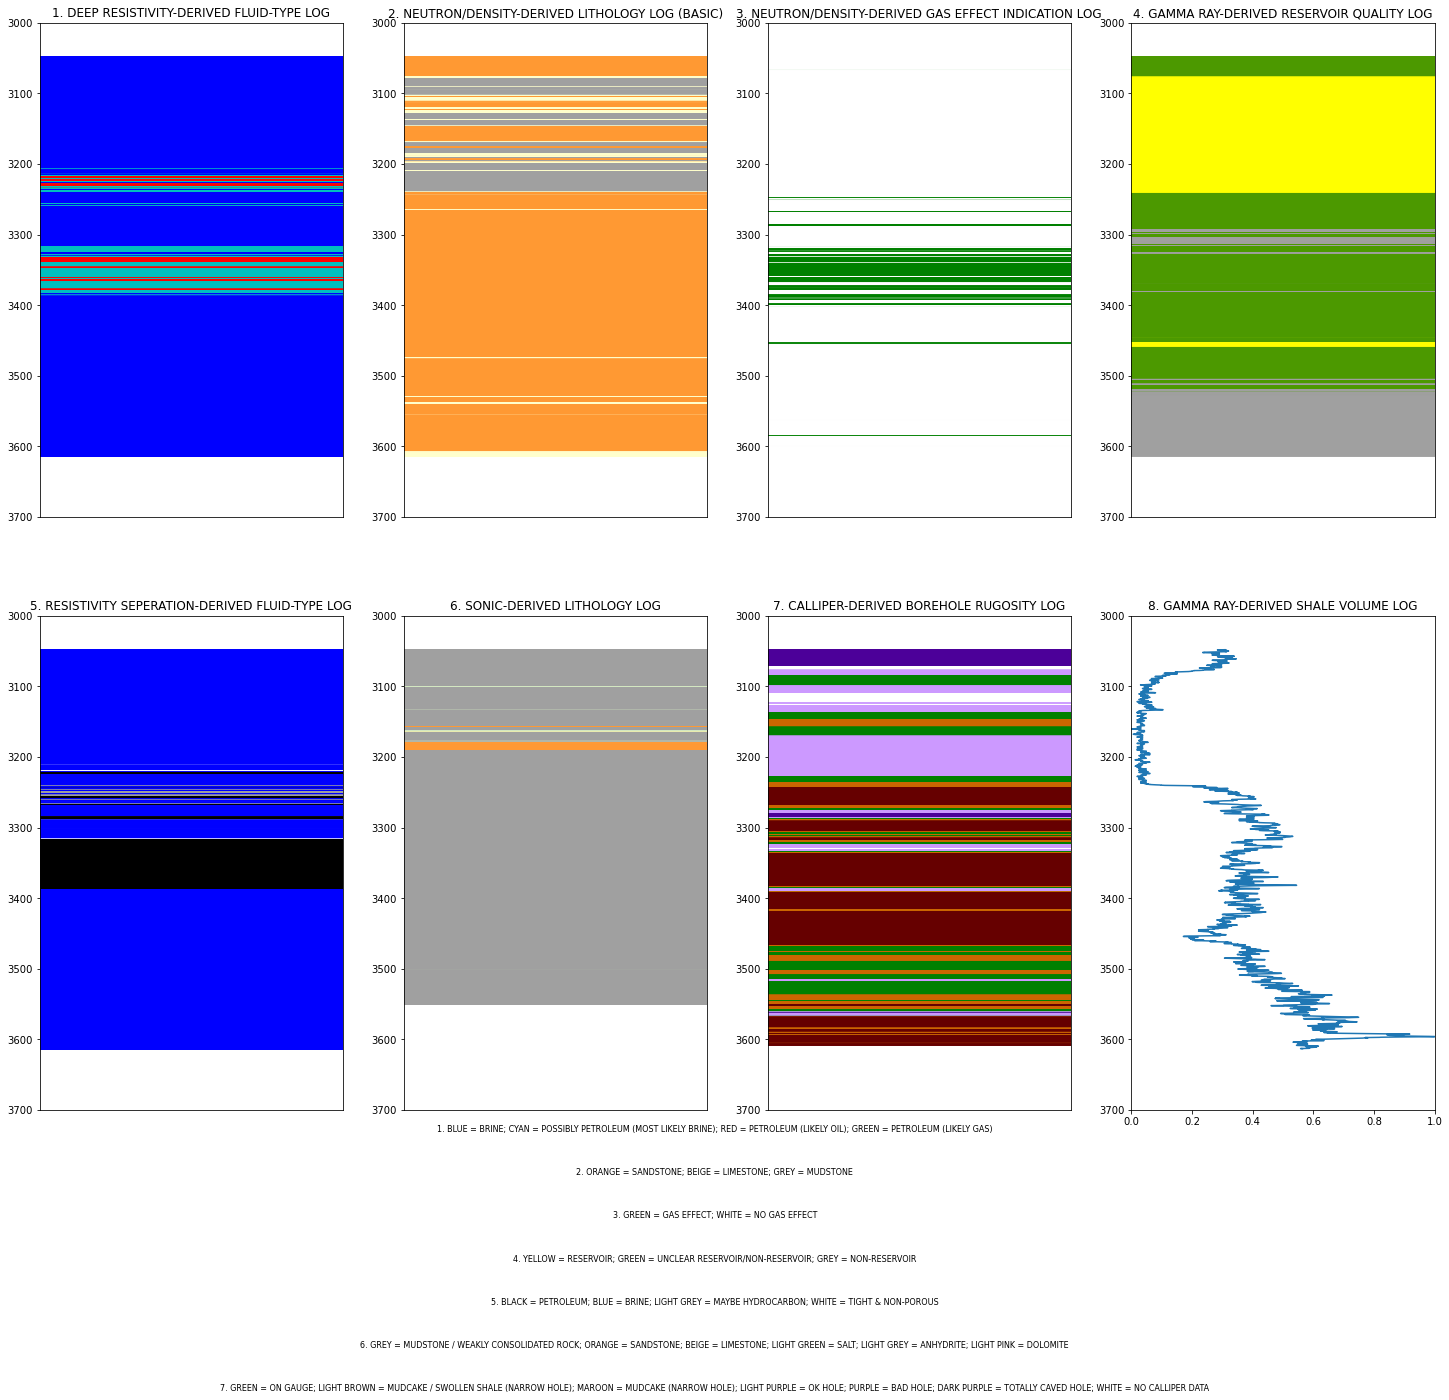

In [5]:
#AUTOINTERPRET PETROPHYSICAL DATA FROM ABOVE.
import matplotlib.pyplot as plt
#Initialize a set of lists - 1 corresponding to each column of data.
DEPTH_list = []
GR_list = []
CALI_list = []
RHOB_list = []
CNL_list = []
SONIC_list = []
MSFL_list = []
LLS_list = []
LLD_list = []
FLUID_LIST = []

#DEEP RESISTIVITY-DERIVED FLUID-TYPE LOG
#Loop through the dataframe hosting the data and extract it into the lists above. Now we can work with python object type 'list' rather than python object type 'dataframe'. This is for simplicity.
for i,j,k,l,m,n,o,p,q in zip(df_2.DEPTH, df_2.GR, df_2.CALI, df_2.RHOB, df_2.CNL, df_2.SONIC, df_2.MSFL, df_2.LL9S, df_2.R_deep): 
    DEPTH_list.append(i)
    GR_list.append(j)
    CALI_list.append(k)
    RHOB_list.append(l)
    CNL_list.append(m)
    SONIC_list.append(n)
    MSFL_list.append(o)
    LLS_list.append(p)
    LLD_list.append(q)
    #Code below will assign a fluid type based on the deep resistivity tool. This is most likely sampling the native reservoir fluid from the uninvaded/virgin zone.
    if q >= 30 : #Potentially gas
        FLUID_LIST.append('g')
    elif 10 <= q < 30: #Potentially oil
        FLUID_LIST.append('o')
    elif 5 <= q < 10: #Potentially oil, but unlikely
        FLUID_LIST.append('MAYBE o')
    else : #Most likely brine/water
        FLUID_LIST.append('b')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 20)) #create a 2 x 4 structure such that the 8 data tracks are plotted side-by-side in two rows.

plt.subplot(2, 4, 1) #Subplot in 1st position of 1st row.
for i,j in zip(FLUID_LIST, DEPTH_list) :
    if i == 'b' :
        plt.axhline(y=j, color='b', linestyle='-')
    elif i == 'MAYBE o' :
        plt.axhline(y=j, color='c', linestyle='-')
    elif i == 'o' :
        plt.axhline(y=j, color='r', linestyle='-')
    elif i == 'g' :
        plt.axhline(y=j, color='g', linestyle='-')
    
plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.
plt.title('1. DEEP RESISTIVITY-DERIVED FLUID-TYPE LOG') #add a title for the plot
plt.xticks([]) #don't display the x-axis values.

##########################################################################################################################################

Normalized_RHOB_list = []
Normalized_CNL_list = []
LITHOLOGY_LIST = []

#NEUTRON/DENSITY-DERIVED LITHOLOGY LOG (BASIC)
#For loops below normalize the bulk density and neutron log values to a scale of 0 to 1, so that they can be compared directly. This is like plotting the CNL and RHOB curves on the same track and manually interpreting lithology.
for i in RHOB_list:
    if (i-2) <= 0 :
        Normalized_RHOB_list.append(0)
    elif 0 < (i-2) <= 1 :
        Normalized_RHOB_list.append(i-2)
    else :
        Normalized_RHOB_list.append(1)

for i in CNL_list:
    if (i-(-15))/60. <= 0 :
        Normalized_CNL_list.append(0)
    elif 0 < (i-(-15))/60. <= 1 :
        Normalized_CNL_list.append((i-(-15))/60.)
    else :
        Normalized_CNL_list.append(1)
        
for i,j,k,l in zip(DEPTH_list, GR_list, Normalized_RHOB_list, Normalized_CNL_list) :
    if l - k >= 0.05 :
        LITHOLOGY_LIST.append('sand')
    elif l - k <= -0.05 :
        LITHOLOGY_LIST.append('shale')
    else :
        LITHOLOGY_LIST.append('limestone')
        
plt.subplot(2, 4, 2) #Subplot in 2nd position of 1st row.
for i,j in zip(LITHOLOGY_LIST, DEPTH_list) :
    if i == 'sand' :
        plt.axhline(y=j, color='#FF9933', linestyle='-')
    elif i == 'shale' :
        plt.axhline(y=j, color='#A0A0A0', linestyle='-')
    elif i == 'limestone' :
        plt.axhline(y=j, color='#FFFFCC', linestyle='-')

plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.
plt.title('2. NEUTRON/DENSITY-DERIVED LITHOLOGY LOG (BASIC)') #add a title for the plot
plt.xticks([]) #don't display the x-axis values.

######################################################################################################################################################

GAS_EFFECT_LIST = []

#NEUTRON/DENSITY-DERIVED GAS EFFECT INDICATION LOG
plt.subplot(2, 4, 3) #Subplot in 3rd position of 1st row.
#for loops below determine whether the gas effect is potentially exhibited. it does so by seeing if the RHOB and CNL lines vary by at least 4 tracks in a 10 sub-track divided standard track.
for i,j,k,l in zip(DEPTH_list, GR_list, Normalized_RHOB_list, Normalized_CNL_list) :
    if l - k >= 0.4 :
        GAS_EFFECT_LIST.append('gas')
    else :
        GAS_EFFECT_LIST.append('none')
        
for i,j in zip(GAS_EFFECT_LIST, DEPTH_list) :
    if i == 'gas' :
        plt.axhline(y=j, color='g', linestyle='-')
    elif i == 'none' :
        plt.axhline(y=j, color='w', linestyle='-')
         
plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.
plt.title('3. NEUTRON/DENSITY-DERIVED GAS EFFECT INDICATION LOG') #add a title for the plot
plt.xticks([]) #don't display the x-axis values.

##############################################################################################################################

RESERVOIR_LIST = []

#GAMMA RAY-DERIVED RESERVOIR QUALITY LOG
plt.subplot(2,4,4) #Subplot in 4th position of 1st row.
#for loops below estimate reservoir or non-reservoir based on GR API value. 
for i, j in zip(GR_list, DEPTH_list) :
    if i > 70 :
        RESERVOIR_LIST.append('non-reservoir')
    elif 40 <= i <= 70 :
        RESERVOIR_LIST.append('unsure')
    elif i < 40  :
        RESERVOIR_LIST.append('reservoir')

for i,j in zip(RESERVOIR_LIST, DEPTH_list) :
    if i == 'non-reservoir' :
        plt.axhline(y=j, color='#A0A0A0', linestyle='-')
    elif i == 'reservoir' :
        plt.axhline(y=j, color='#FFFF00', linestyle='-')  
    elif i == 'unsure' :
        plt.axhline(y=j, color='#4C9900', linestyle='-')    
        
plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.
plt.title('4. GAMMA RAY-DERIVED RESERVOIR QUALITY LOG') #add a title for the plot
plt.xticks([]) #don't display the x-axis values.

######################################################################################################################################################################################################

HYDROCARBON_LIST = []

#RESISTIVITY SEPERATION-DERIVED FLUID-TYPE LOG
plt.subplot(2,4,5) #Subplot in 1st position of 2nd row.
#for loops below estimate the fluids present based on the seperation of the three different penetration resistivity tools. 
for i, j, k, l in zip(DEPTH_list, MSFL_list, LLS_list, LLD_list) :
    if l >= k and l >= 1.5*j :
        HYDROCARBON_LIST.append("hydrocarbon")
    elif l >= k and 1.2*j <= l < 1.5*j :
        HYDROCARBON_LIST.append("maybe hydrocarbon")
    elif 0.95*k <= l <= 1.05*k and 0.95*j <= l <= 1.05*j :
        HYDROCARBON_LIST.append("non-porous")
    else :
        HYDROCARBON_LIST.append("water")
        
for i,j in zip(HYDROCARBON_LIST, DEPTH_list) :
    if i == 'hydrocarbon' :
        plt.axhline(y=j, color='#000000', linestyle='-')
    elif i == 'maybe hydrocarbon' :
        plt.axhline(y=j, color='#A0A0A0', linestyle='-')  
    elif i == 'water' :
        plt.axhline(y=j, color='b', linestyle='-')   
    elif i == 'non-porous' :
        plt.axhline(y=j, color='w', linestyle='-')   
        
plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.
plt.title('5. RESISTIVITY SEPERATION-DERIVED FLUID-TYPE LOG') #add a title for the plot
plt.xticks([]) #don't display the x-axis values.

##############################################################################################################################################################################################

SONIC_LITHO_LIST = []

#SONIC-DERIVED LITHOLOGY LOG
plt.subplot(2,4,6) #Subplot in 2nd position of 2nd row.
#for loops below estimate lithology based on slowness value.
for i, j in zip(DEPTH_list, SONIC_list) :
    if 51 <= j <= 56 :
        SONIC_LITHO_LIST.append("sandstone")
    elif 44 < j <= 49 :
        SONIC_LITHO_LIST.append("limestone")
    elif 49 < j < 51 :
        SONIC_LITHO_LIST.append("anhydrite")
    elif 43 <= j <= 44 :
        SONIC_LITHO_LIST.append("dolomite")
    elif 66 <= j <= 67 :
        SONIC_LITHO_LIST.append("salt")
    elif j > 67 :
        SONIC_LITHO_LIST.append("shale")
        
for i,j in zip(SONIC_LITHO_LIST, DEPTH_list) :
    if i == 'sandstone' :
        plt.axhline(y=j, color='#FF9933', linestyle='-')
    elif i == 'shale' :
        plt.axhline(y=j, color='#A0A0A0', linestyle='-')  
    elif i == 'limestone' :
        plt.axhline(y=j, color='#FFFFCC', linestyle='-')   
    elif i == 'anhydrite' :
        plt.axhline(y=j, color='#E0E0E0', linestyle='-')  
    elif i == 'dolomite' :
        plt.axhline(y=j, color='#FFCCCC', linestyle='-') 
    elif i == 'salt' :
        plt.axhline(y=j, color='#E5FFCC', linestyle='-') 
        
plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.
plt.title('6. SONIC-DERIVED LITHOLOGY LOG') #add a title for the plot
plt.xticks([]) #don't display the x-axis values.

###################################################################################################################################################

BAD_HOLE_LIST = []

#CALLIPER-DERIVED BOREHOLE RUGOSITY LOG
plt.subplot(2,4,7) #Subplot in 3rd position of 2nd row.
#ensure no blank items ('NaN') in calliper list
cleaned_CALI_list = [x for x in CALI_list if pd.notnull(x)]
#calculate the likely hole size.
average_hole_size = sum(cleaned_CALI_list) / float(len(cleaned_CALI_list))

#for loops below estimate the quality of the hole based on the calliper reading relative to the average calliper reading (taken to be the hole diameter).
for i, j in zip(DEPTH_list, cleaned_CALI_list) :
    if average_hole_size <= j <= 1.1*average_hole_size :
        BAD_HOLE_LIST.append('on gauge')
    elif 0.9*average_hole_size <= j < average_hole_size :
        BAD_HOLE_LIST.append('mudcake or swollen shale')
    elif j < 0.9*average_hole_size :
        BAD_HOLE_LIST.append('mudcake')
    elif 1.1*average_hole_size  < j <= 1.2*average_hole_size :
        BAD_HOLE_LIST.append('ok hole')
    elif 1.2*average_hole_size  < j <= 1.3*average_hole_size :
        BAD_HOLE_LIST.append('poor hole')
    else :
        BAD_HOLE_LIST.append('terrible hole')
        
for i,j in zip(BAD_HOLE_LIST, DEPTH_list) :
    if i == 'on gauge' :
        plt.axhline(y=j, color='g', linestyle='-')
    elif i == 'mudcake or swollen shale' :
        plt.axhline(y=j, color='#CC6600', linestyle='-')  
    elif i == 'mudcake' :
        plt.axhline(y=j, color='#660000', linestyle='-')   
    elif i == 'ok hole' :
        plt.axhline(y=j, color='#CC99FF', linestyle='-')  
    elif i == 'bad hole' :
        plt.axhline(y=j, color='#9933FF', linestyle='-') 
    elif i == 'terrible hole' :
        plt.axhline(y=j, color='#4C0099', linestyle='-') 
        
plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.
plt.title('7. CALLIPER-DERIVED BOREHOLE RUGOSITY LOG') #add a title for the plot
plt.xticks([]) #don't display the x-axis values.

####################################################################################################################################################################

SHALE_VOLUME_LIST = []

#GAMMA RAY-DERIVED SHALE VOLUME LOG
plt.subplot(2,4,8) #Subplot in 4th position of 2nd row.

shale_line = max(GR_list) #estimate the shale line value
sand_line = min(GR_list) #estimate the sand line value

#calculate volume of shale at each depth from standard Gamma Ray formula.
for i in GR_list :
    v_sh = (i - sand_line) / (shale_line - sand_line)
    SHALE_VOLUME_LIST.append(v_sh)

plt.plot(SHALE_VOLUME_LIST, DEPTH_list) #plot interpreted v_sh
plt.grid 
plt.title("8. GAMMA RAY-DERIVED SHALE VOLUME LOG") #add a title for the plot
plt.xlim(0,1) #bounds of x-axis.
plt.ylim(3000,3700) #bounds of y-axis.
plt.gca().invert_yaxis() #ensure depth increases downward.

############################################################################################################################################################

#code below will print a key below the figure once this kernel is executed. 
txt = '1. BLUE = BRINE; CYAN = POSSIBLY PETROLEUM (MOST LIKELY BRINE); RED = PETROLEUM (LIKELY OIL); GREEN = PETROLEUM (LIKELY GAS)'
txt2 = '2. ORANGE = SANDSTONE; BEIGE = LIMESTONE; GREY = MUDSTONE'
txt3 = '3. GREEN = GAS EFFECT; WHITE = NO GAS EFFECT'
txt4 = '4. YELLOW = RESERVOIR; GREEN = UNCLEAR RESERVOIR/NON-RESERVOIR; GREY = NON-RESERVOIR'
txt5 = '5. BLACK = PETROLEUM; BLUE = BRINE; LIGHT GREY = MAYBE HYDROCARBON; WHITE = TIGHT & NON-POROUS'
txt6 = '6. GREY = MUDSTONE / WEAKLY CONSOLIDATED ROCK; ORANGE = SANDSTONE; BEIGE = LIMESTONE; LIGHT GREEN = SALT; LIGHT GREY = ANHYDRITE; LIGHT PINK = DOLOMITE'
txt7 = '7. GREEN = ON GAUGE; LIGHT BROWN = MUDCAKE / SWOLLEN SHALE (NARROW HOLE); MAROON = MUDCAKE (NARROW HOLE); LIGHT PURPLE = OK HOLE; PURPLE = BAD HOLE; DARK PURPLE = TOTALLY CAVED HOLE; WHITE = NO CALLIPER DATA'
#code below controls the positioning/location of the key.
plt.figtext(0.5, 0.11, txt, wrap=True, horizontalalignment='center', fontsize=8)
plt.figtext(0.5, 0.08, txt2, wrap=True, horizontalalignment='center', fontsize=8)
plt.figtext(0.5, 0.05, txt3, wrap=True, horizontalalignment='center', fontsize=8)
plt.figtext(0.5, 0.02, txt4, wrap=True, horizontalalignment='center', fontsize=8)
plt.figtext(0.5, -0.01, txt5, wrap=True, horizontalalignment='center', fontsize=8)
plt.figtext(0.5, -0.04, txt6, wrap=True, horizontalalignment='center', fontsize=8)
plt.figtext(0.5, -0.07, txt7, wrap=True, horizontalalignment='center', fontsize=8)

plt.savefig("Computed_Petrophysical_Analysis.pdf", bbox_inches='tight') #write interpreted logs to a .pdf
plt.show() #show plots in kernel console.